In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Indian Airlines.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df['stops'] = df['stops'].map({'zero' : 0, 'one' : 1, 'two_or_more' : 2})

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df['stops'].duplicated().sum()

np.int64(300150)

In [12]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '').str.replace('-', '_')

In [13]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
print(df['stops'].isna().sum())        # Should print 0
print(df['stops'].unique())


0
[0 1 2]


### Histogram
- Prics vs Class
- Duration vs Class
- Days Left vs Class

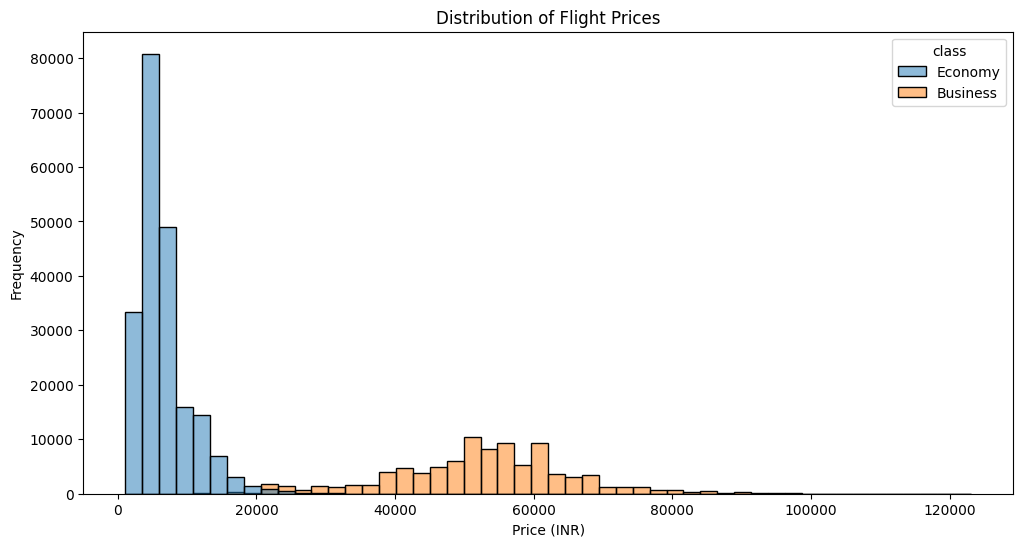

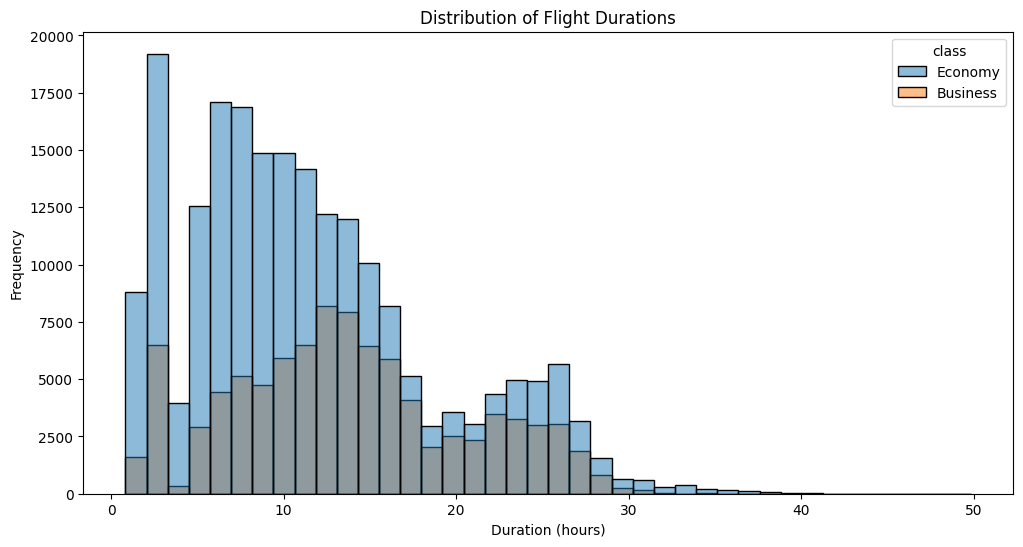

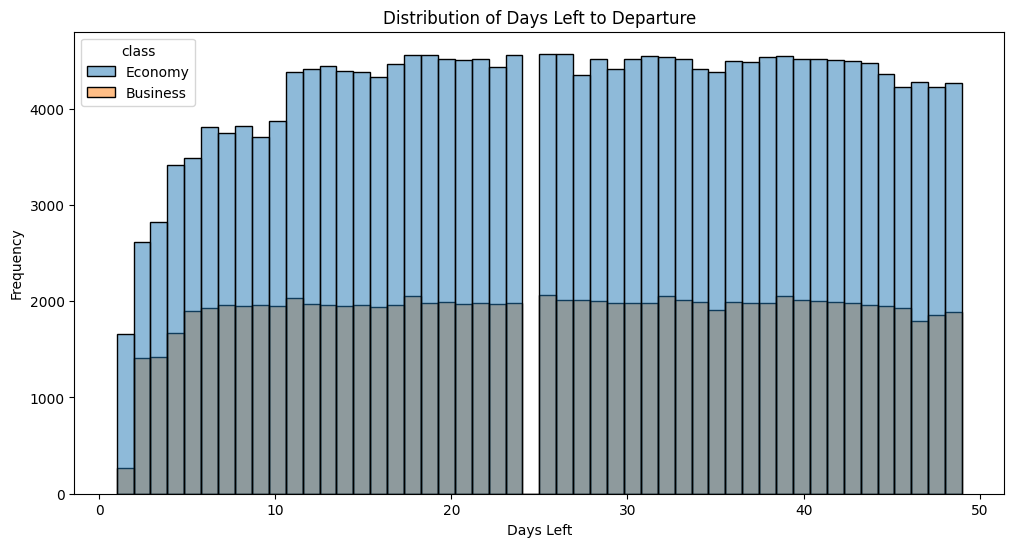

In [15]:
# Plot: Price
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', bins=50, hue = 'class')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Plot: Duration
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', bins=40, hue = 'class')
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Plot: Days Left
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='days_left', bins=50, hue = 'class')
plt.title('Distribution of Days Left to Departure')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()

### Countplot
- airline
- class
- source_city
- destination_city
- departure_time
- arrival_time

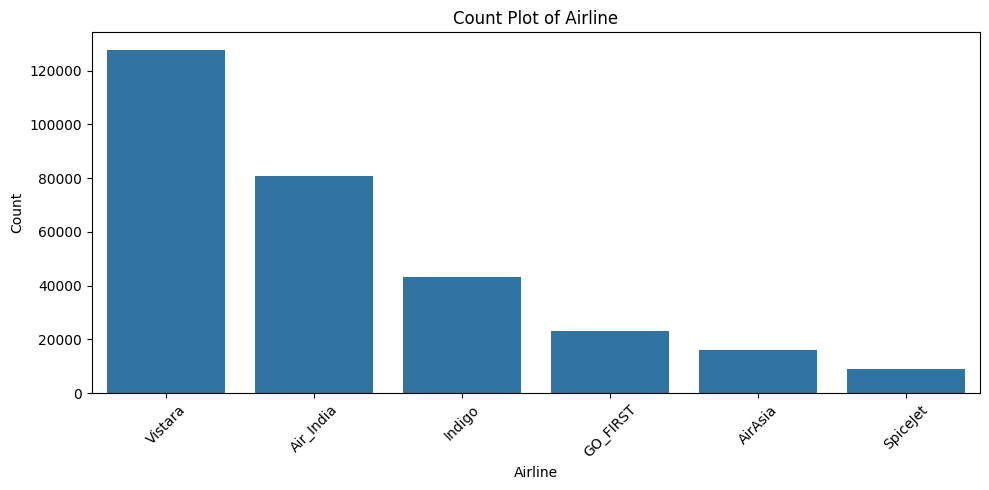

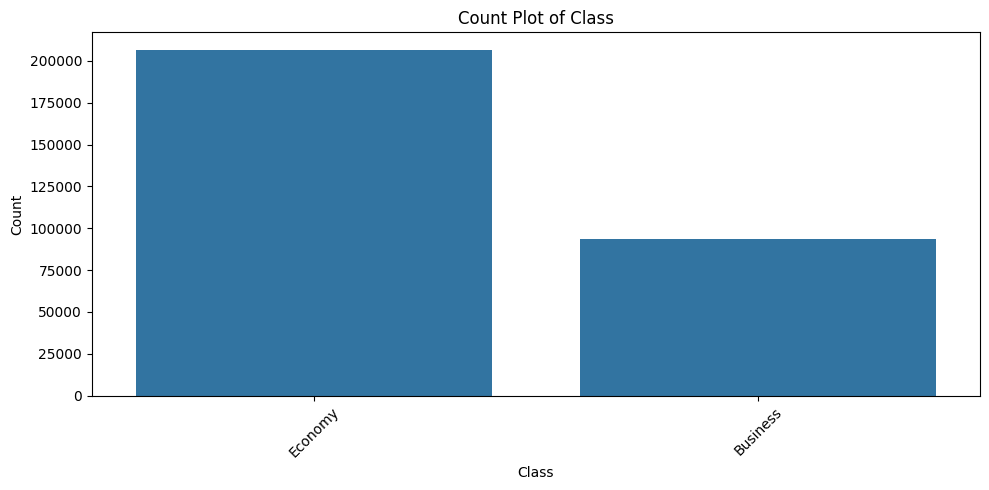

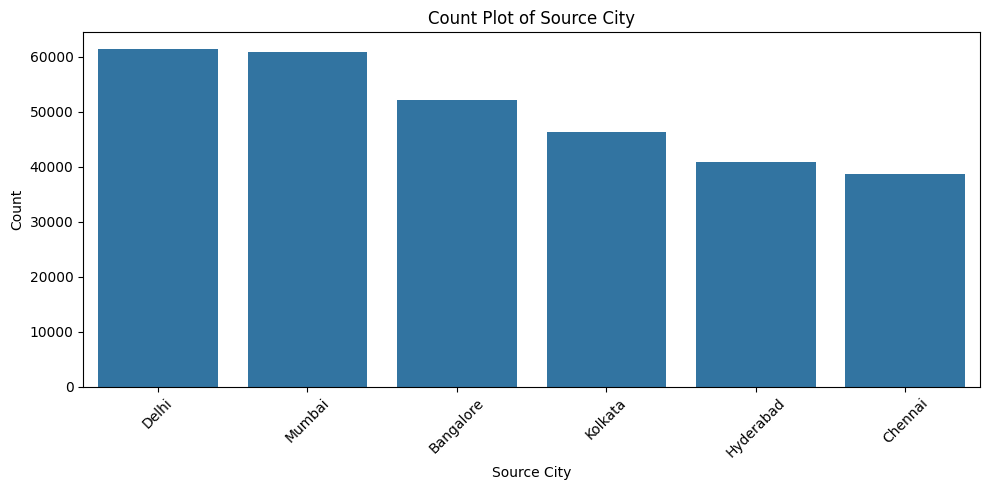

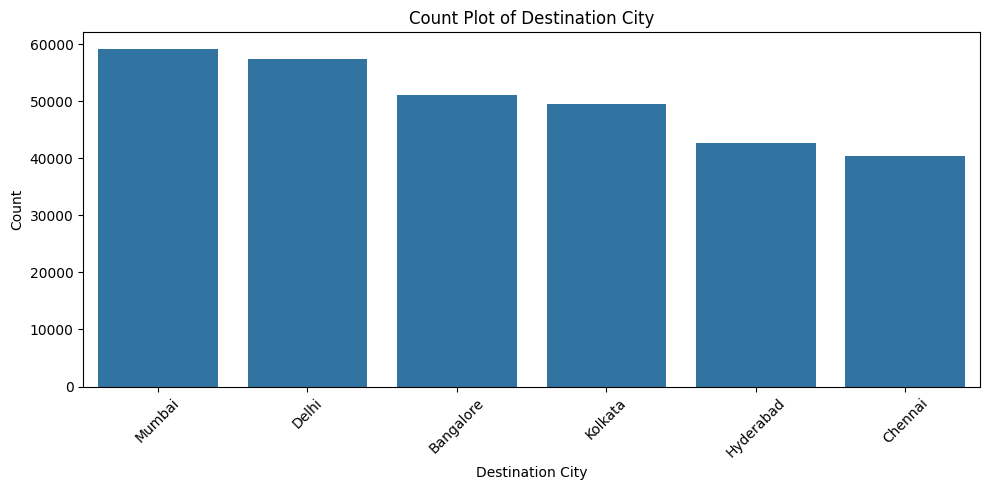

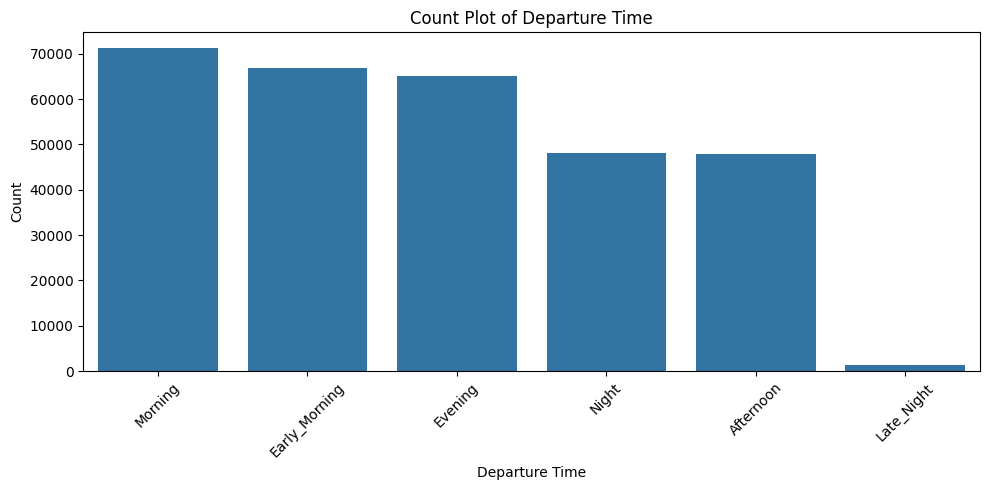

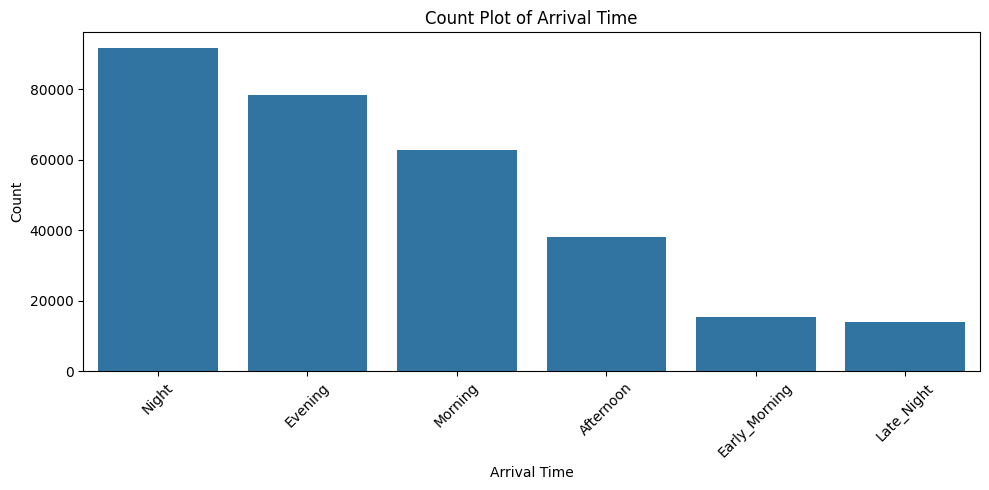

In [16]:

# Define list of categorical columns to plot
cat_columns = ['airline', 'class', 'source_city', 'destination_city', 'departure_time', 'arrival_time']

# Plot each countplot in a loop
for col in cat_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col.replace('_', ' ').title()}")
    plt.xticks(rotation=45)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Duration vs. Price (scatter)

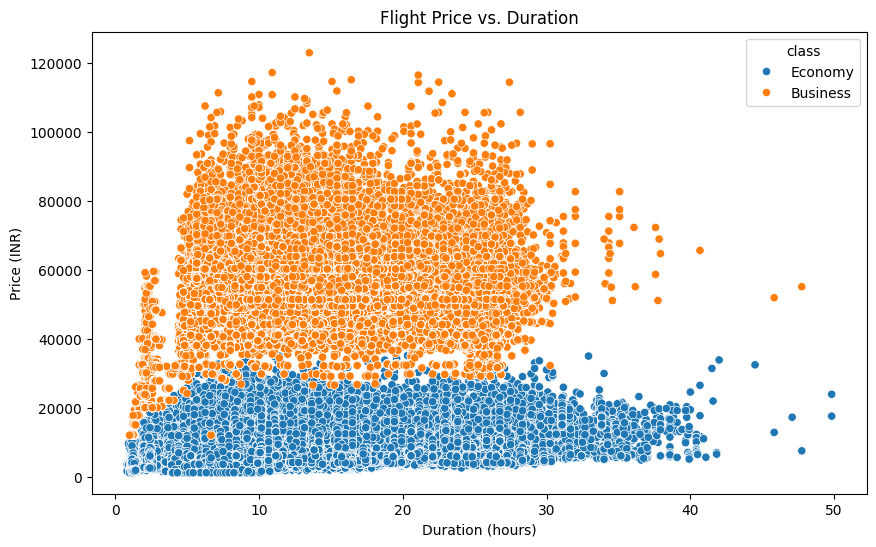

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='class')
plt.title("Flight Price vs. Duration")
plt.xlabel("Duration (hours)")
plt.ylabel("Price (INR)")
plt.show()

### Box plot to compare the distribution of flight prices by class.

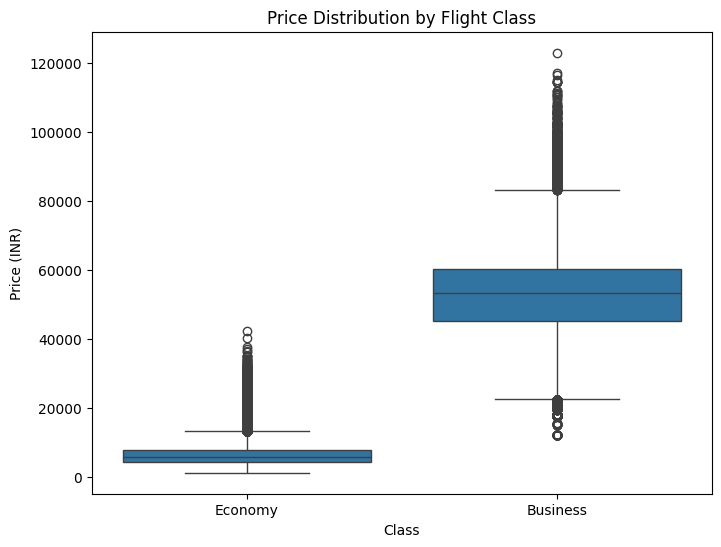

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='price')
plt.title("Price Distribution by Flight Class")
plt.xlabel("Class")
plt.ylabel("Price (INR)")
plt.show()

###  Compare Price Across Airlines

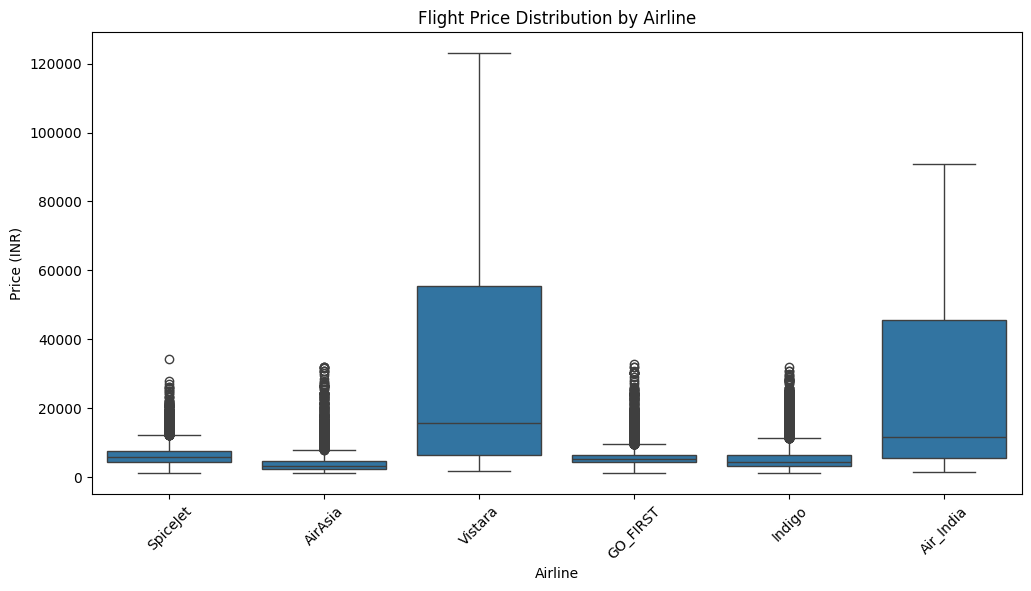

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='price')
plt.xticks(rotation=45)
plt.title("Flight Price Distribution by Airline")
plt.xlabel("Airline")
plt.ylabel("Price (INR)")
plt.show()

### Compare Price Across Stops

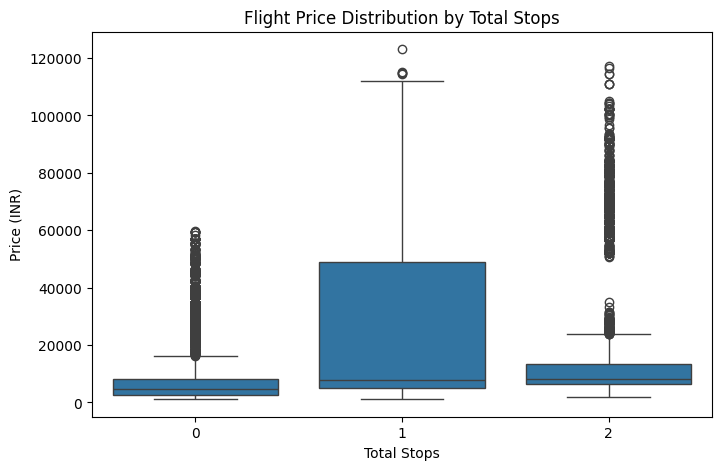

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='stops', y='price')
plt.title("Flight Price Distribution by Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Price (INR)")
plt.show()


### Compare Price Across Routes

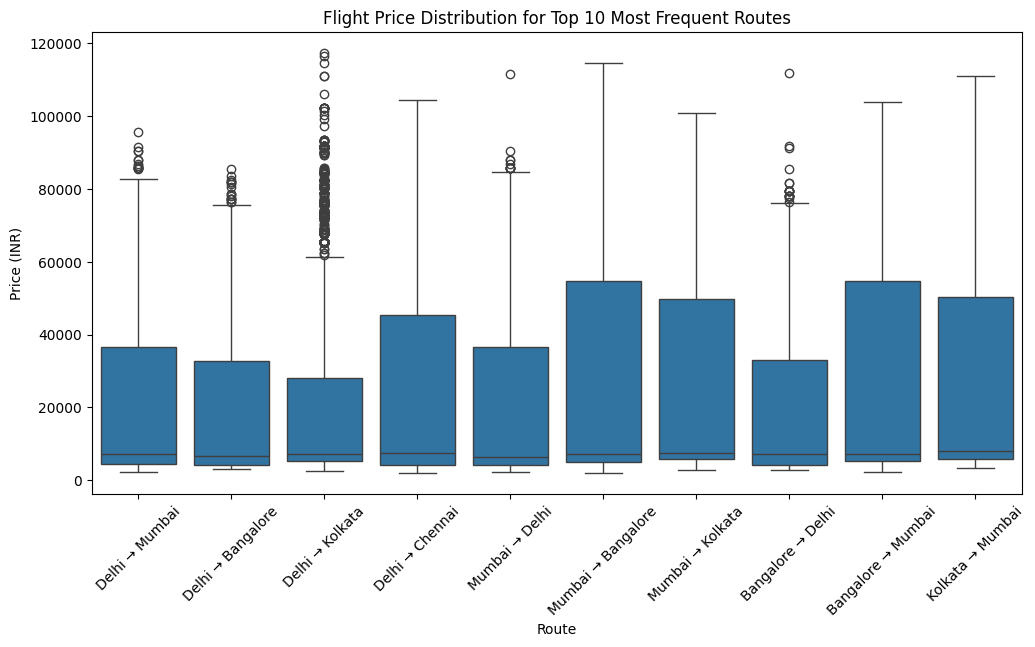

In [21]:
df['route'] = df['source_city'] + " → " + df['destination_city']

# Step 1: Identify top 10 most frequent routes
top_routes = df['route'].value_counts().head(10).index

# Step 2: Filter the DataFrame to include only those routes
filtered_df = df[df['route'].isin(top_routes)]

# Step 3: Plot boxplot for these filtered routes
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='route', y='price')
plt.xticks(rotation=45)
plt.title("Flight Price Distribution for Top 10 Most Frequent Routes")
plt.xlabel("Route")
plt.ylabel("Price (INR)")
plt.show()

### Outlier Detection (on price)

In [22]:
# Calculate Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers (IQR method): {outliers_iqr.shape[0]}")

Number of outliers (IQR method): 123


### Z-Score Method for Outlier Detection

In [23]:
from scipy.stats import zscore

# Calculate z-scores
df['price_zscore'] = zscore(df['price'])

# Define threshold (commonly 3)
outliers_z = df[(np.abs(df['price_zscore']) > 3)]
print(f"Number of outliers (Z-score method): {outliers_z.shape[0]}")

# Optional: drop this temp column
df.drop('price_zscore', axis=1, inplace=True)


Number of outliers (Z-score method): 602


In [24]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'route'],
      dtype='object')

In [25]:
# Convert departure time to datetime if needed
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [26]:
df['departure_time'] = df['departure_time'].map({'Late_Night': 1, 'Early_Morning': 2, 'Morning': 3, 'Afternoon': 4, 'Evening': 5, 'Night': 6})
df['departure_time'].value_counts()

departure_time
3    71146
2    66790
5    65102
6    48015
4    47794
1     1306
Name: count, dtype: int64

In [27]:
df['departure_time'].unique()

array([5, 2, 3, 4, 6, 1])

### Boxplot

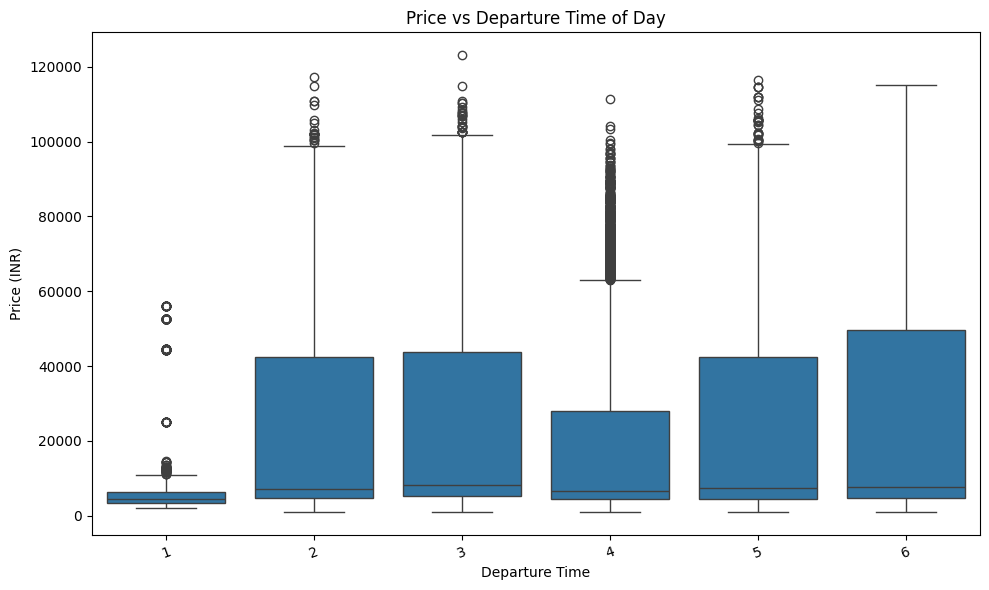

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='departure_time', y='price', data=df)
plt.title('Price vs Departure Time of Day')
plt.xlabel('Departure Time')
plt.ylabel('Price (INR)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



In [29]:
df.to_excel('Airfare Insights.xlsx', index = False)
print("Excel file created successfully!")

Excel file created successfully!


In [33]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'route'],
      dtype='object')

### Price by Airline

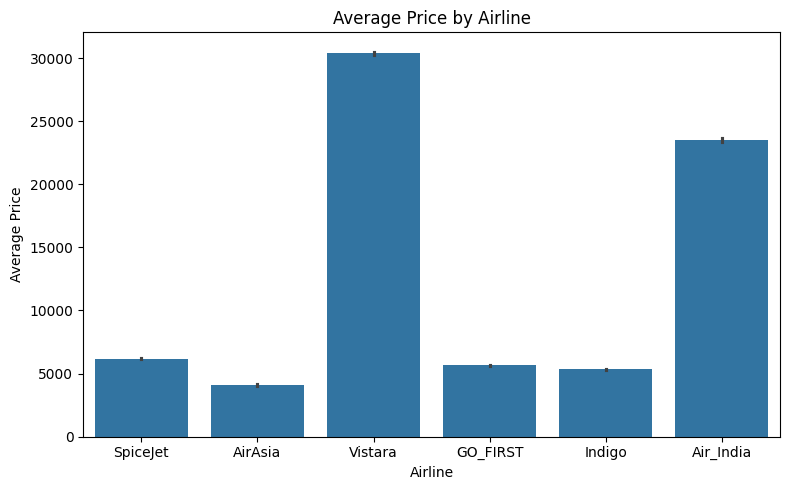

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='airline', y='price')
plt.title('Average Price by Airline')
plt.ylabel('Average Price')
plt.xlabel('Airline')
plt.tight_layout()
plt.show()

### Stops vs. Fare

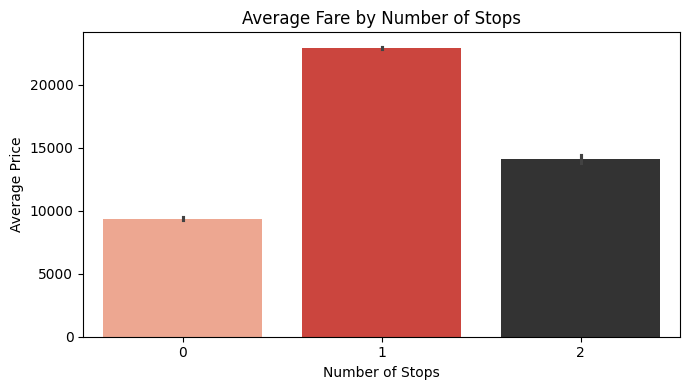

In [42]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='stops', y='price', hue = 'stops', palette='Reds_d', legend = False)
plt.title('Average Fare by Number of Stops')
plt.ylabel('Average Price')
plt.xlabel('Number of Stops')
plt.tight_layout()
plt.show()

### Source-Destination Routes (Top 10 by Count)

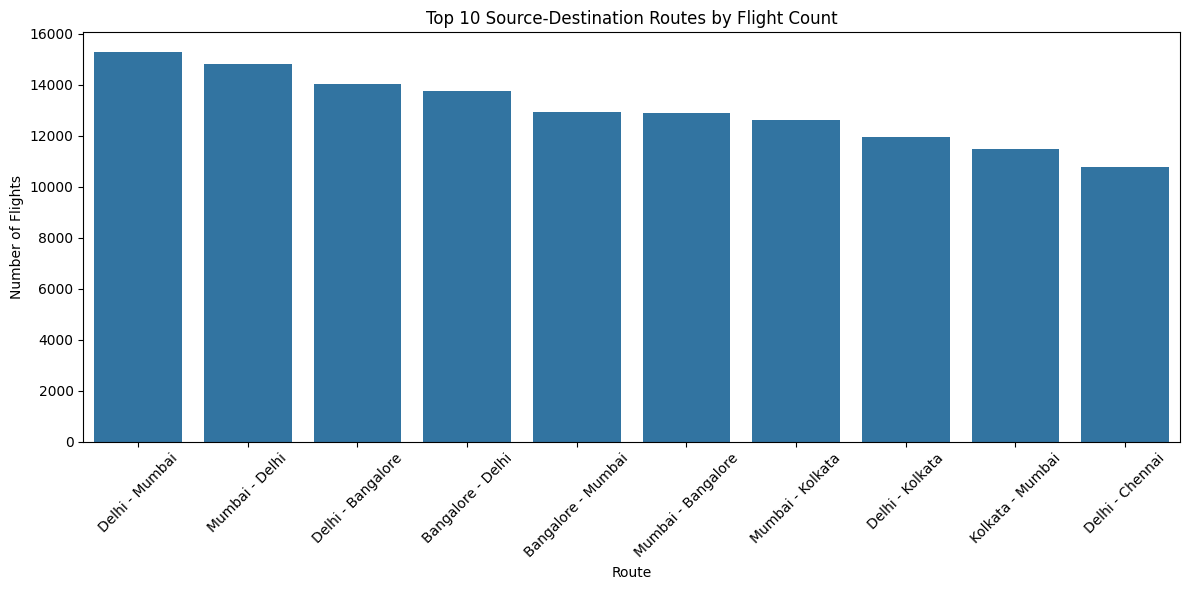

In [46]:
df['route'] = df['source_city'] + ' - ' + df['destination_city']
top_routes = df['route'].value_counts().head(10).index
route_counts = df[df['route'].isin(top_routes)]['route'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=route_counts.index, y=route_counts.values)
plt.title('Top 10 Source-Destination Routes by Flight Count')
plt.ylabel('Number of Flights')
plt.xlabel('Route')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Statistical Analysis


In [49]:
# T-Test
from scipy.stats import ttest_ind
zero_stop = df[df['stops'] == 0]['price']
one_stop = df[df['stops'] == 1]['price']
stat, p = ttest_ind(zero_stop, one_stop, equal_var=False)
print(f"T-statistic: {round(stat,2)}, p-value: {p}")

T-statistic: -184.75, p-value: 0.0


In [51]:
# ANNOVA
from scipy.stats import f_oneway
groups = [prices['price'].values for _, prices in df.groupby('airline')]
stat, p = f_oneway(*groups)
print(f"F-statistic: {round(stat,2)}, p-value: {p}")

F-statistic: 17194.4, p-value: 0.0


In [54]:
# Correlation: Duration and Price
correlation = df['duration'].corr(df['price'])
print(f"Correlation between duration and price: {round(correlation,3)}")

Correlation between duration and price: 0.204
